<a href="https://colab.research.google.com/github/wereign/aera-vera-keras-nathu-geras/blob/main/CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10


In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
x_train[0].shape

(32, 32, 3)

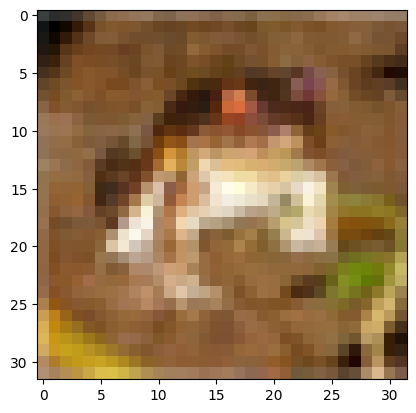

In [7]:
plt.imshow(x_train[0])

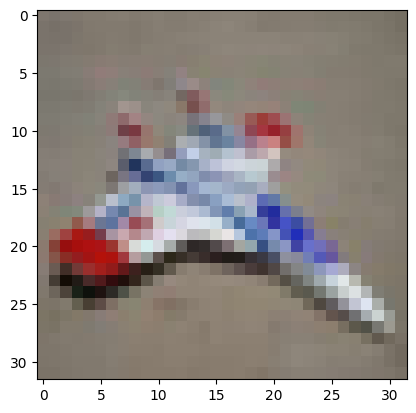

In [8]:
plt.imshow(x_train[30])

In [9]:
x_train = x_train/255

In [10]:
x_test = x_test/255

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [16]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [18]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),padding='valid',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding='valid',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#flattening the images
model.add(Flatten())
model.add(Dense(256,activation='relu'))

#OUTPUT Layer --> Softmax
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping


In [21]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [22]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])


Epoch 1/15
1563/1563 [==============================] - 88s 55ms/step - loss: 1.4888 - accuracy: 0.4600 - val_loss: 1.2761 - val_accuracy: 0.5456
Epoch 2/15
1563/1563 [==============================] - 82s 53ms/step - loss: 1.1808 - accuracy: 0.5849 - val_loss: 1.1372 - val_accuracy: 0.6026
Epoch 3/15
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0387 - accuracy: 0.6329 - val_loss: 1.0943 - val_accuracy: 0.6096
Epoch 4/15
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9358 - accuracy: 0.6707 - val_loss: 1.0098 - val_accuracy: 0.6439
Epoch 5/15
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8455 - accuracy: 0.7042 - val_loss: 0.9709 - val_accuracy: 0.6662
Epoch 6/15
1563/1563 [==============================] - 83s 53ms/step - loss: 0.7687 - accuracy: 0.7321 - val_loss: 0.9854 - val_accuracy: 0.6647
Epoch 7/15
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7021 - accuracy: 0.7541 - val_loss: 1.0069 -

In [23]:
model.save('cifar10_keras.h5')


In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()


In [ ]:
metrics[['accuracy','val_accuracy']].plot()
